<a href="https://colab.research.google.com/github/bob8dod/Kaggle_and_Dacon/blob/main/%EB%94%B0%EB%A6%89%EC%9D%B4_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import numpy as np

In [113]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [114]:
pd.to_datetime('2018')

Timestamp('2018-01-01 00:00:00')

In [115]:
df_train['date_time'] = pd.to_datetime(df_train['date_time'])

In [116]:
df_train = df_train.set_index('date_time')

In [117]:
df_train.shape

(273, 9)

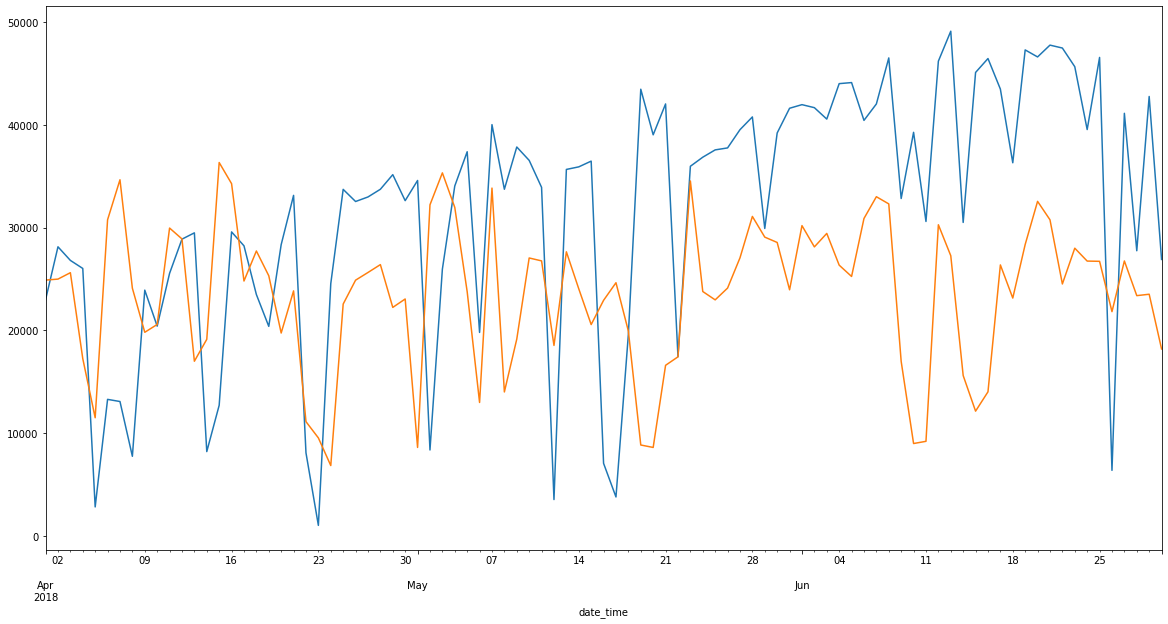

In [118]:
df_train['number_of_rentals']['2018'].plot(figsize=(20,10))
df_train['wind_direction']['2018'].apply(lambda x:120*x).plot(figsize=(20,10))

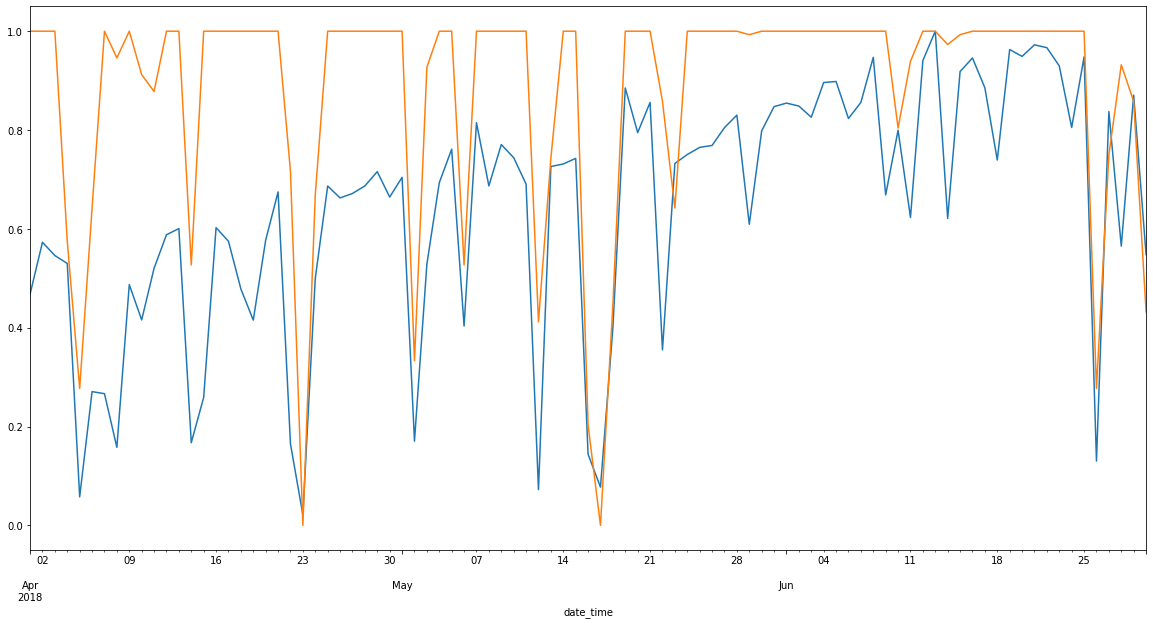

In [119]:
df_train['number_of_rentals']['2018'].apply(lambda x: x/max(df_train['number_of_rentals']['2018'])).plot(figsize=(20,10))
df_train['precipitation_form']['2018'].apply(lambda x:(1-x)).plot(figsize=(20,10))

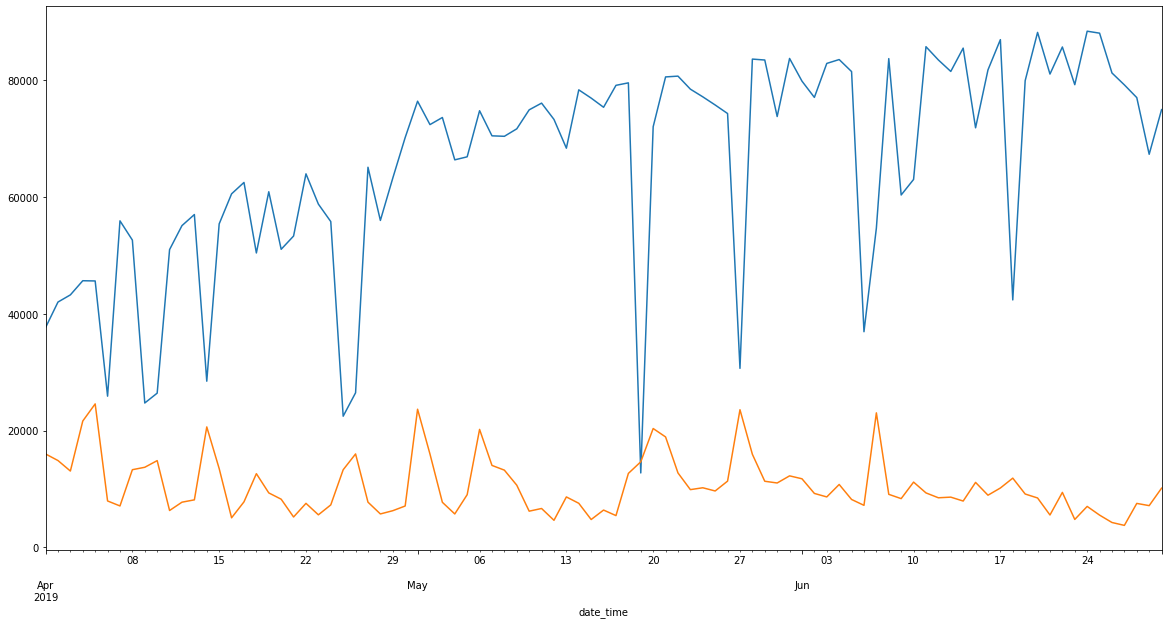

In [120]:
df_train['number_of_rentals']['2019'].plot(figsize=(20,10))
df_train['wind_speed']['2019'].apply(lambda x:5000*x).plot(figsize=(20,10))

In [121]:
t = (df_train['low_temp'] + df_train['high_temp'])*3/4
rh = df_train['humidity']
dd = ((9/5)*t - 0.55*(1-rh/100)*((9/5)*t-26)+32)

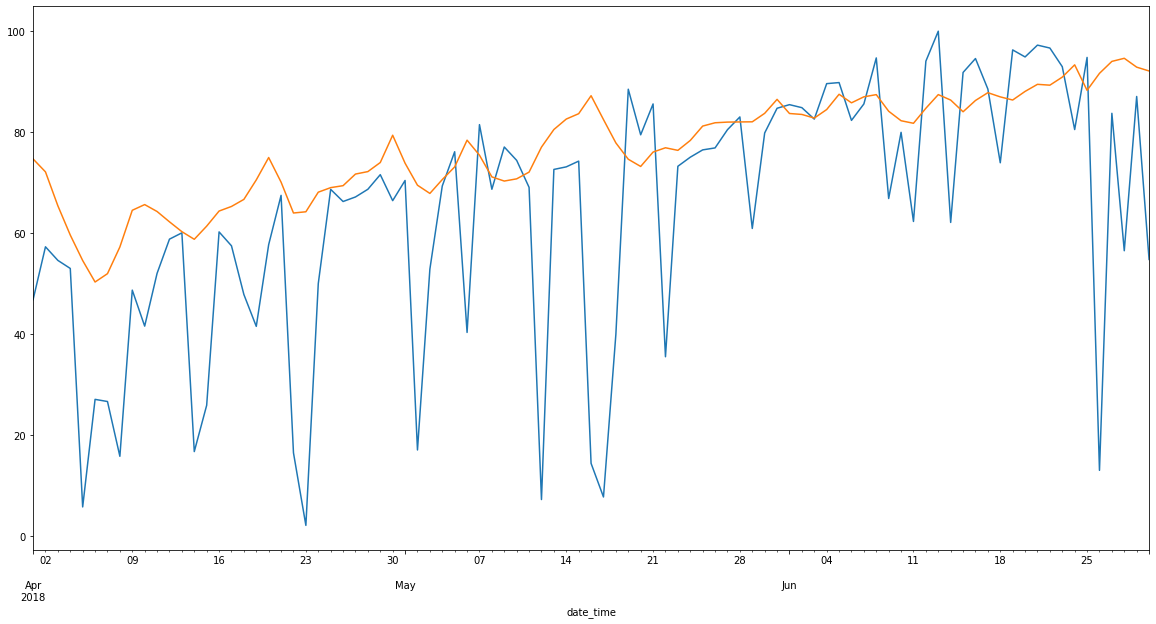

In [122]:
df_train['number_of_rentals']['2018'].apply(lambda x: 100*(x/max(df_train['number_of_rentals']['2018']))).plot(figsize=(20,10))
dd['2018'].plot(figsize=(20,10))

In [123]:
df_train['displeasure'] = dd.apply(lambda x:round(x,3))

In [124]:
df_train['temp'] = (3*(df_train['low_temp'] + df_train['high_temp'])/4).apply(lambda x:round(x,3))

In [125]:
df_train

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,displeasure,temp
date_time,,,,,,,,,,,
2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,74.698,25.200
2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,72.135,23.859
2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,65.410,19.221
2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,59.621,15.510
2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,54.576,12.222
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150,92.217,36.019
2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001,94.161,37.240
2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568,93.338,37.540


In [126]:
y_train = df_train['number_of_rentals']
x_train = df_train.drop(['wind_direction','wind_speed','number_of_rentals'], axis=1)
x_train

,sky_condition,precipitation_form,humidity,low_temp,high_temp,Precipitation_Probability,displeasure,temp
date_time,,,,,,,,
2018-04-01,4.000,0.000,75.000,12.600,21.000,30.000,74.698,25.200
2018-04-02,2.950,0.000,69.833,12.812,19.000,19.500,72.135,23.859
2018-04-03,2.911,0.000,74.879,10.312,15.316,19.113,65.410,19.221
2018-04-04,3.692,0.425,71.849,8.312,12.368,43.493,59.621,15.510
2018-04-05,4.000,0.723,73.784,5.875,10.421,63.378,54.576,12.222
...,...,...,...,...,...,...,...,...
2020-06-26,3.980,0.223,78.378,20.500,27.526,36.486,92.217,36.019
2020-06-27,2.865,0.081,78.412,20.812,28.842,21.081,94.161,37.240
2020-06-28,1.730,0.000,72.736,21.000,29.053,7.297,93.338,37.540


In [127]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [128]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
x_train = rs.fit_transform(x_train)
x_test = rs.transform(x_train)

In [129]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

[09:42:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
